In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
movies_df=pd.read_csv('Movies_Complete.csv')

In [4]:
movies_df

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Actors,Runtime,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice
0,0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,"Steve Carell, Morgan Freeman, Lauren Graham",96 min,English,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298"
1,1,2,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,"Kevin Costner, Jeanne Tripplehorn, Dennis Hopper",177 min,English,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220"
2,2,3,5/12/2017,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure,...,"Charlie Hunnam, Astrid Bergès-Frisbey, Jude Law",126 min,English,"United Kingdom, United States, Australia",10 nominations,https://m.media-amazon.com/images/M/MV5BMjM3OD...,41,6.7,"226,822","$39,175,066"
3,3,4,12/25/2013,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action,...,"Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki",128 min,"English, Japanese","United States, United Kingdom, Japan, Hungary",5 nominations,https://m.media-amazon.com/images/M/MV5BMTc0Mj...,28,6.2,"167,943","$38,362,475"
4,4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,Universal,PG-13,Action,...,"Chris Pratt, Bryce Dallas Howard, Rafe Spall",128 min,"English, Russian","United States, China",4 wins & 26 nominations,https://m.media-amazon.com/images/M/MV5BNzIxMj...,51,6.1,"334,600","$417,719,760"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3398,3397,10/28/2011,Like Crazy,250000,3395391,3728400,Paramount Pictures,PG-13,Drama,...,"Felicity Jones, Anton Yelchin, Jennifer Lawrence",86 min,English,United States,9 wins & 7 nominations,https://m.media-amazon.com/images/M/MV5BMjAzOT...,68,6.6,"62,865","$3,395,391"
3396,3399,3398,7/14/2000,Chuck&Buck,250000,1055671,1157672,Artisan,R,Drama,...,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found,Movie not found
3397,3400,3399,3/28/1997,Love and Other Catastrophes,250000,212285,743216,Fox Searchlight,R,Comedy,...,"Frances O'Connor, Alice Garner, Matt Day",78 min,English,Australia,1 win & 5 nominations,https://m.media-amazon.com/images/M/MV5BMTg5Nj...,58,6.5,"2,055","$294,212"
3398,3401,3400,8/28/1998,I Married a Strange Person,250000,203134,203134,Lionsgate,NaN,Comedy,...,"Charis Michelsen, Tom Larson, Richard Spore",75 min,English,United States,3 wins & 4 nominations,https://m.media-amazon.com/images/M/MV5BOTM2NG...,NaN,6.9,"2,093","$206,272"


In [5]:
#Add a column with the revenue of each movie
movies_df['Revenue'] = movies_df['worldwide_gross']-movies_df['production_budget']
movies_df['%_Revenue'] = (movies_df['Revenue']/movies_df['production_budget'])*100

# Actors Analysis
 Most popular actors

The actors that have more revenue 

The genres of the most popular actors 

In [6]:
#Add the list of actors in each movie
movies_df['Actors'] = movies_df['Actors'].str.replace(', ',',')
movies_df['Actors'] = movies_df['Actors'].str.replace(' ,',',')
movies_df['Actors List'] = movies_df['Actors'].str.split(',')
movies_df['imdbVotes'] = movies_df['imdbVotes'].str.replace(',','')
movies_df['BoxOffice'] = movies_df['BoxOffice'].str.replace(',','')
movies_df['BoxOffice'] = movies_df['BoxOffice'].str.replace('$','')
#Delete the movies that don't have actors data
movies_df_clean=movies_df.loc[movies_df['Actors']!='Movie not found']
movies_df_clean=movies_df_clean.loc[movies_df_clean['Actors'].notnull()]
movies_df_clean.columns
movies_df_clean.head(1)


,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Actors List
0,0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,152796,100462298,-868671,-0.496383,"[Steve Carell, Morgan Freeman, Lauren Graham]"


In [7]:
#Change the values of columns to numeric

movies_df_clean['Metascore']=pd.to_numeric(movies_df_clean['Metascore'])
movies_df_clean['imdbRating']=pd.to_numeric(movies_df_clean['imdbRating'])
movies_df_clean['imdbVotes']=pd.to_numeric(movies_df_clean['imdbVotes'])
movies_df_clean['BoxOffice']=pd.to_numeric(movies_df_clean['BoxOffice'])


In [114]:
#Create a exploded list to analyze each actor
movies_explode_actors=movies_df_clean.explode("Actors List")
movies_explode_actors_grouped=movies_explode_actors.groupby(['Actors List'])

In [115]:
#Create a list of all actors
actors = movies_explode_actors['Actors List'].unique()
actors_metrics =pd.DataFrame()
actors_metrics['Actor']=actors


#Create metrics the metrics of the actors 
av_rev=[]
per_av_rev=[]
movie_count=[]
av_budget=[]
av_metascore=[]
av_imdbscore=[]
genres=[]
av_boxoffice=[]
for actor in actors:
    av_rev.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['Revenue'].mean())
    per_av_rev.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['%_Revenue'].mean())
    movie_count.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['Title'].count())
    av_budget.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['production_budget'].mean())
    av_metascore.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['Metascore'].mean())
    av_imdbscore.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['imdbRating'].mean())
    genres.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['genre'].unique())
    av_boxoffice.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['BoxOffice'].mean())

actors_metrics['Average budget']=av_budget
actors_metrics['Average revenue']=av_budget
actors_metrics['Percentage average revenue']=per_av_rev
actors_metrics['Average boxOffice']=av_boxoffice
actors_metrics['Movie count']=movie_count
actors_metrics['Average metascore']=av_metascore
actors_metrics['Average imdbScore']=av_imdbscore
actors_metrics['Genres']=genres
actors_metrics

,Actor,Average budget,Average revenue,Percentage average revenue,Average boxOffice,Movie count,Average metascore,Average imdbScore,Genres
410,Robert De Niro,3.772727e+07,3.772727e+07,274.315482,5.759411e+07,33,56.843750,6.784848,"[Comedy, Adventure, Action, Drama]"
192,Bruce Willis,5.964286e+07,5.964286e+07,153.299652,6.455057e+07,28,51.785714,6.571429,"[Adventure, Action, Drama, Comedy]"
21,Samuel L. Jackson,5.288889e+07,5.288889e+07,218.539947,6.867875e+07,27,53.296296,6.681481,"[Action, Adventure, Horror, Drama, Comedy]"
46,Eddie Murphy,6.520370e+07,6.520370e+07,319.143266,1.119005e+08,27,46.000000,5.796296,"[Adventure, Comedy, Action, Horror]"
84,Mark Wahlberg,5.044444e+07,5.044444e+07,198.908837,7.845626e+07,27,54.703704,6.548148,"[Drama, Adventure, Comedy, Action]"
...,...,...,...,...,...,...,...,...,...
2085,Bibi Andersson,2.000000e+07,2.000000e+07,-70.406290,NaN,1,NaN,6.300000,[Adventure]
2086,Maggie Wheeler,2.000000e+07,2.000000e+07,-100.000000,NaN,1,NaN,3.000000,[Adventure]
2087,Joey D. Vieira,2.000000e+07,2.000000e+07,-100.000000,NaN,1,NaN,3.000000,[Adventure]
2089,Raad Rawi,1.910000e+07,1.910000e+07,-68.766251,1.361512e+06,1,52.000000,7.100000,[Drama]


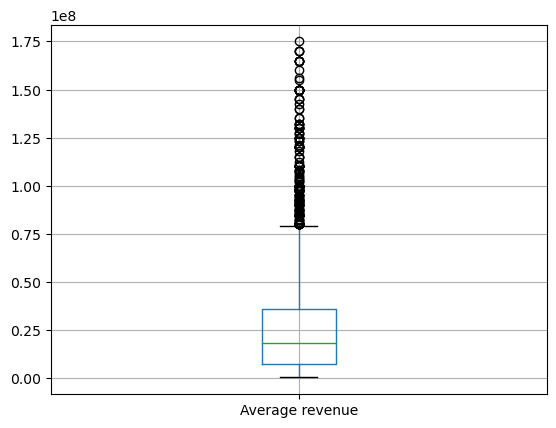

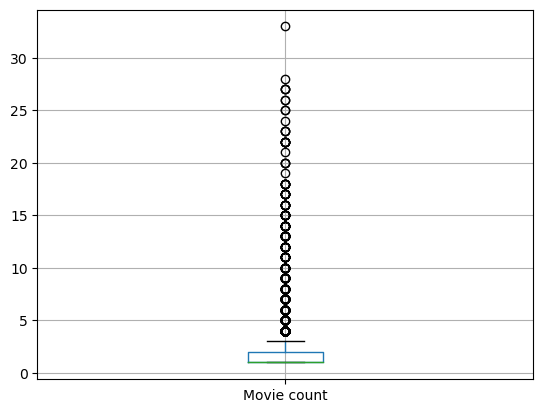

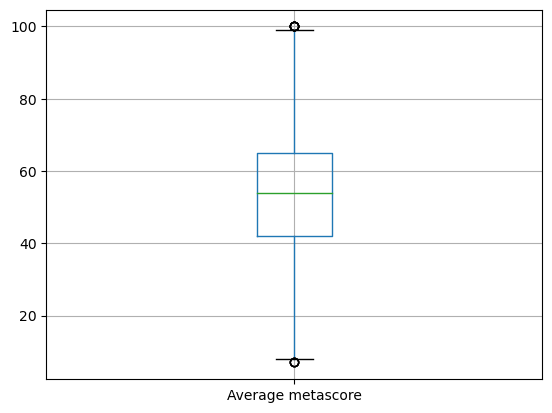

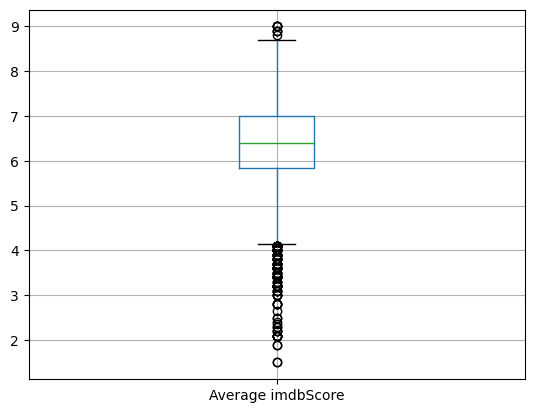

In [157]:
#Plot the behaviour of the metrics
actors_metrics.boxplot(column='Average revenue')
plt.show()
actors_metrics.boxplot(column='Movie count')
plt.show()
actors_metrics.boxplot(column='Average metascore')
plt.show()
actors_metrics.boxplot(column='Average imdbScore')
plt.show()

In [149]:
#Define the perfect actor
#Genre:
Genre= 'Horror'
#Average revenue: in the highest 25% of all actors
q3_av_revenue = actors_metrics['Average revenue'].quantile(0.75)

#Experience (movie count): in the highest 25% of all actors
q3_movie_count = actors_metrics['Movie count'].quantile(0.75)

#Average metascore (critics score): in the highest 25% of all actors
q3_metascore = actors_metrics['Average metascore'].quantile(0.75)

#Average imdbScore (people score): in the highest 25% of all actors
q3_imdbscore = actors_metrics['Average imdbScore'].quantile(0.75)

print(f'Genre: {Genre}')
print(f'Average Revenue: >={q3_av_revenue}')
print(f'Movie count: >={q3_movie_count}')
print(f'Metascore: >={q3_metascore}')
print(f'imdbScore: >={q3_imdbscore}')

Genre: Horror
Average Revenue: >=36000000.0
Movie count: >=2.0
Metascore: >=65.0
imdbScore: >=7.0


In [151]:
#Filter the gender:
actors_search = actors_metrics[actors_metrics['Genres'].apply(lambda series: Genre in series)].sort_values(by='Percentage average revenue', ascending=False)

#Filter the Average revenue:
actors_search = actors_search.loc[actors_search['Average revenue']>=q3_av_revenue]

#Filter the experience:
actors_search = actors_search.loc[actors_search['Movie count']>=q3_movie_count]

#Filter the metascore:
actors_search = actors_search.loc[actors_search['Average metascore']>=q3_metascore]

#Filter the imdbScore:
actors_search = actors_search.loc[actors_search['Average imdbScore']>=q3_imdbscore]

actors_search.sort_values(by='Average revenue',ascending=False)

,Actor,Average budget,Average revenue,Percentage average revenue,Average boxOffice,Movie count,Average metascore,Average imdbScore,Genres
67,James McAvoy,5.144444e+07,5.144444e+07,785.818220,6.617815e+07,9,65.222222,7.022222,"[Action, Adventure, Drama, Horror]"
61,Jessica Chastain,5.002500e+07,5.002500e+07,141.778130,4.767044e+07,10,69.700000,7.050000,"[Adventure, Action, Horror, Drama]"
127,Jeremy Renner,4.788889e+07,4.788889e+07,239.499444,7.571559e+07,9,69.555556,7.066667,"[Action, Drama, Comedy, Horror]"
290,Jack Nicholson,4.449286e+07,4.449286e+07,392.758514,9.468489e+07,14,65.285714,7.278571,"[Action, Drama, Comedy, Horror]"
